In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
import folium

import matplotlib
matplotlib.rcParams['font.family']='Malgun Gothic'
matplotlib.rcParams['axes.unicode_minus'] = False

idx = pd.IndexSlice

In [2]:
crimeDF = pd.read_csv('data/crime_in_Seoul.csv', encoding='euc-kr', thousands=',')
crimeDF

,관서명,살인 발생,살인 검거,강도 발생,강도 검거,강간 발생,강간 검거,절도 발생,절도 검거,폭력 발생,폭력 검거
0,중부서,2,2,3,2,105,65,1395,477,1355,1170
1,종로서,3,3,6,5,115,98,1070,413,1278,1070
2,남대문서,1,0,6,4,65,46,1153,382,869,794
3,서대문서,2,2,5,4,154,124,1812,738,2056,1711
4,혜화서,3,2,5,4,96,63,1114,424,1015,861
5,용산서,5,5,14,14,194,173,1557,587,2050,1704
6,성북서,2,2,2,1,86,71,953,409,1194,1015
7,동대문서,5,5,13,13,173,146,1981,814,2548,2227
8,마포서,8,8,14,10,294,247,2555,813,2983,2519
9,영등포서,14,12,22,20,295,183,2964,978,3572,2961


1. 살인발생이 가장높은 관서명, 살인발생,살인검거를 출력하시오.

In [3]:
crimeDF[crimeDF['살인 발생'] == crimeDF['살인 발생'].max()][['관서명', '살인 발생','살인 검거']]

,관서명,살인 발생,살인 검거
9,영등포서,14,12


2. 관서별 절도발생,절도검거에 대한 바차트를 그리시오.

<Axes: xlabel='관서명'>

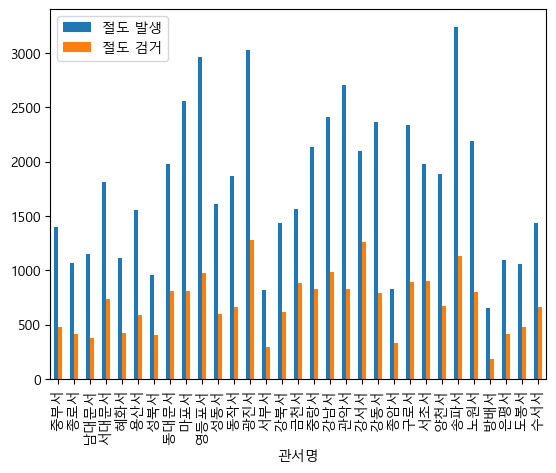

In [ ]:
crimeDF.plot(kind='bar', x='관서명', y=['절도 발생', '절도 검거'])

3. 절도검거율 컬럼을 추가 하시오.

In [5]:
crimeDF['절도검거율'] = crimeDF['절도 검거']/crimeDF['절도 발생']*100

crimeDF

,관서명,살인 발생,살인 검거,강도 발생,강도 검거,강간 발생,강간 검거,절도 발생,절도 검거,폭력 발생,폭력 검거,절도검거율
0,중부서,2,2,3,2,105,65,1395,477,1355,1170,34.193548
1,종로서,3,3,6,5,115,98,1070,413,1278,1070,38.598131
2,남대문서,1,0,6,4,65,46,1153,382,869,794,33.130963
3,서대문서,2,2,5,4,154,124,1812,738,2056,1711,40.728477
4,혜화서,3,2,5,4,96,63,1114,424,1015,861,38.061041
5,용산서,5,5,14,14,194,173,1557,587,2050,1704,37.700706
6,성북서,2,2,2,1,86,71,953,409,1194,1015,42.917104
7,동대문서,5,5,13,13,173,146,1981,814,2548,2227,41.090358
8,마포서,8,8,14,10,294,247,2555,813,2983,2519,31.819961
9,영등포서,14,12,22,20,295,183,2964,978,3572,2961,32.995951


4. 상관관계와 heatmap을 그리시오.

In [85]:
crimeDF.iloc[:,1:].corr()

,살인 발생,살인 검거,강도 발생,강도 검거,강간 발생,강간 검거,절도 발생,절도 검거,폭력 발생,폭력 검거,절도검거율
살인 발생,1.000000,0.953920,0.640281,0.486899,0.621728,0.572858,0.662590,0.575135,0.754575,0.755763,-0.019993
살인 검거,0.953920,1.000000,0.648964,0.505346,0.575409,0.571278,0.653474,0.587725,0.802798,0.807260,0.014842
강도 발생,0.640281,0.648964,1.000000,0.866390,0.745120,0.798568,0.744599,0.702067,0.793311,0.801213,0.043121
강도 검거,0.486899,0.505346,0.866390,1.000000,0.604698,0.744171,0.710847,0.718638,0.696732,0.699700,0.115837
강간 발생,0.621728,0.575409,0.745120,0.604698,1.000000,0.915617,0.807301,0.781462,0.762625,0.756427,0.071175
강간 검거,0.572858,0.571278,0.798568,0.744171,0.915617,1.000000,0.838196,0.831827,0.800653,0.800535,0.120781
절도 발생,0.662590,0.653474,0.744599,0.710847,0.807301,0.838196,1.000000,0.888714,0.897244,0.889385,-0.084518
절도 검거,0.575135,0.587725,0.702067,0.718638,0.781462,0.831827,0.888714,1.000000,0.846821,0.852488,0.363117
폭력 발생,0.754575,0.802798,0.793311,0.696732,0.762625,0.800653,0.897244,0.846821,1.000000,0.997356,0.071899
폭력 검거,0.755763,0.807260,0.801213,0.699700,0.756427,0.800535,0.889385,0.852488,0.997356,1.000000,0.099122


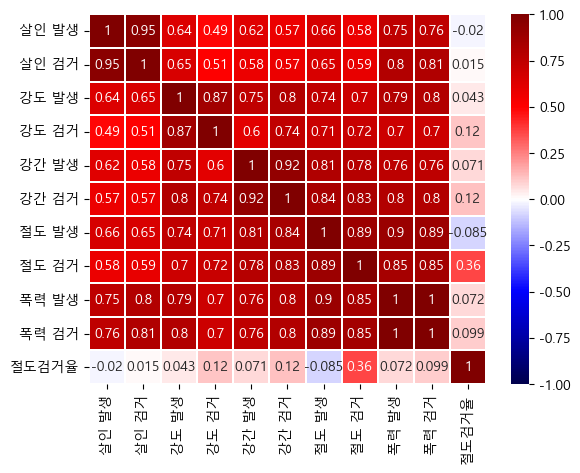

In [86]:
sb.heatmap( crimeDF.iloc[:,1:].corr() ,vmin=-1, vmax=1 ,annot=True, cmap='seismic', linewidths=0.2)
plt.show()

5. 폭력발생, 폭력검거의 scatter를 그리시오.
- 도로교통공단_전국_사망교통사고정보(2018).csv

In [91]:
carDF = pd.read_csv('data/도로교통공단_전국_사망교통사고정보(2018).csv', encoding='euc-kr', thousands=',')
carDF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3657 entries, 0 to 3656
Data columns (total 27 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   발생년            3657 non-null   int64  
 1   발생년월일시         3657 non-null   int64  
 2   발생분            3657 non-null   int64  
 3   주야             3657 non-null   object 
 4   요일             3657 non-null   object 
 5   사망자수           3657 non-null   int64  
 6   사상자수           3657 non-null   int64  
 7   중상자수           3657 non-null   int64  
 8   경상자수           3657 non-null   int64  
 9   부상신고자수         3657 non-null   int64  
 10  발생지시도          3657 non-null   object 
 11  발생지시군구         3657 non-null   object 
 12  사고유형_대분류       3657 non-null   object 
 13  사고유형_중분류       3657 non-null   object 
 14  사고유형           3657 non-null   object 
 15  법규위반_대분류       3657 non-null   object 
 16  법규위반           3657 non-null   object 
 17  도로형태_대분류       3657 non-null   object 
 18  도로형태    

In [2]:
crimeDF.plot(kind='scatter', x='폭력 발생', y='폭력 검거')

NameError: name 'crimeDF' is not defined

6. 부산에서 일어난 요일별 사망자수, 사상자수 를 출력하시오.

In [76]:
carDF_Busan = carDF[carDF['발생지시도'] == '부산']
carDF_Busan.groupby('요일')[['사망자수','사상자수']].sum()

,사망자수,사상자수
요일,,
금,14,14
목,22,33
수,19,48
월,16,22
일,11,15
토,28,39
화,13,17


7. 부산 해운대구 지역의 교통사고 위치를 지도로 표시하고 각마커에는 법규위반내용을 표시하시오.

In [16]:
carDF_Hae = carDF[carDF['발생지시군구']=='해운대구']
m = folium.Map( location=[35.1795543, 129.0756416],zoom_start=14)

for i, sr in carDF_Hae.iterrows():
    folium.Marker(location=[sr['위도'], sr['경도']], popup=sr['법규위반']).add_to(m)

m

8. 부산에서 발생한 총 사망자수를 구하시오.

In [18]:
carDF_Busan['사망자수'].sum()

np.int64(123)

9. 부산지역 월요일에 발생한 사상자수 사고유형 법규위반을 구하시오.

In [25]:
carDF_Busan[carDF_Busan['요일']=='월'][['사망자수','사고유형','법규위반']]

,사망자수,사고유형,법규위반
37,1,횡단중,안전운전 의무 불이행
467,1,횡단중,안전운전 의무 불이행
468,1,기타,안전운전 의무 불이행
937,1,측면충돌,신호위반
944,1,측면충돌,안전거리 미확보
1391,1,차도통행중,과속
1392,2,측면충돌,중앙선 침범
1393,1,횡단중,과속
1816,1,공작물충돌,안전운전 의무 불이행
1821,1,횡단중,과속


10 .횡단중 일어난 사고의 요일, 발생지시도, 법규위반, 피해자_당사자종별을 구하시오.

In [40]:
carDF[carDF['사고유형']=='횡단중'][['요일','발생지시도','법규위반','피해자_당사자종별']]

,요일,발생지시도,법규위반,피해자_당사자종별
0,수,서울,안전운전 의무 불이행,보행자
1,일,서울,안전운전 의무 불이행,보행자
5,일,서울,안전운전 의무 불이행,보행자
6,월,서울,신호위반,보행자
7,금,서울,과속,보행자
...,...,...,...,...
3636,목,경기,보행자 보호의무 위반,보행자
3639,금,경기,신호위반,보행자
3643,토,경기,안전운전 의무 불이행,보행자
3646,화,경기,안전운전 의무 불이행,보행자


11. 사고유형별 비율을 파이차트로 그리시오.

<Axes: ylabel='count'>

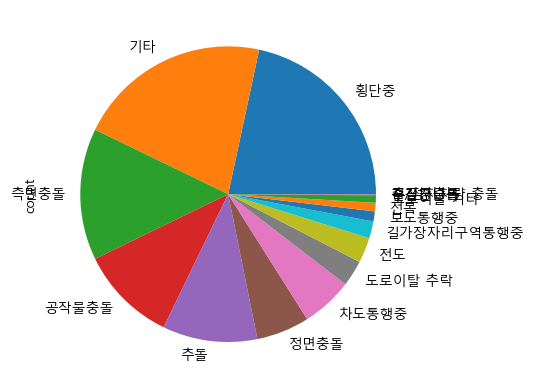

In [83]:
carDF['사고유형'].value_counts().plot(kind='pie')

12.  사고월별 발생건수(발생분)를 구하시오.

In [ ]:
carDF['사고월'] = carDF['발생년월일시'].astype(str).str[4:6]

,발생년,발생년월일시,발생분,주야,요일,사망자수,사상자수,중상자수,경상자수,부상신고자수,...,도로형태_대분류,도로형태,가해자_당사자종별_대분류,가해자_당사자종별,피해자_당사자종별_대분류,피해자_당사자종별,발생위치X_UTMK,발생위치Y_UTMK,경도,위도
사고월,,,,,,,,,,,,,,,,,,,,,
02,2018,2018021406,35,주,수,1,1,0,0,0,...,단일로,기타단일로,승용차,승용차,보행자,보행자,950497.0,1954702.0,126.939274,37.590388
09,2018,2018090205,23,야,일,1,1,0,0,0,...,교차로,교차로횡단보도내,승용차,승용차,보행자,보행자,953337.0,1950150.0,126.971732,37.549508
12,2018,2018121522,35,야,토,1,1,0,0,0,...,단일로,기타단일로,이륜차,이륜차,없음,없음,956967.0,1954807.0,127.012552,37.591659
08,2018,2018082311,30,주,목,1,1,0,0,0,...,단일로,기타단일로,승합차,승합차,없음,없음,958020.0,1959193.0,127.024227,37.631240
07,2018,2018071600,50,야,월,1,1,0,0,0,...,교차로,교차로횡단보도내,화물차,화물차,보행자,보행자,957606.0,1958258.0,127.019590,37.622794
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
05,2018,2018052103,55,야,월,1,1,0,0,0,...,단일로,기타단일로,승용차,승용차,없음,없음,973070.0,1988564.0,127.193701,37.896529
06,2018,2018060808,43,주,금,1,1,0,0,0,...,단일로,기타단일로,화물차,화물차,농기계,농기계,979900.0,2006212.0,127.270890,38.055765
01,2018,2018012010,15,주,토,1,1,0,0,0,...,단일로,기타단일로,승용차,승용차,없음,없음,1001226.0,1959902.0,127.513896,37.638589


In [ ]:
carDF.groupby('사고월').count()

# 시간 부족

,발생년,발생년월일시,발생분,주야,요일,사망자수,사상자수,중상자수,경상자수,부상신고자수,...,도로형태_대분류,도로형태,가해자_당사자종별_대분류,가해자_당사자종별,피해자_당사자종별_대분류,피해자_당사자종별,발생위치X_UTMK,발생위치Y_UTMK,경도,위도
사고월,,,,,,,,,,,,,,,,,,,,,
01,297,297,297,297,297,297,297,297,297,297,...,297,297,297,297,297,297,297,297,297,297
02,267,267,267,267,267,267,267,267,267,267,...,267,267,267,267,267,267,267,267,267,267
03,295,295,295,295,295,295,295,295,295,295,...,295,295,295,295,295,295,295,295,295,295
04,292,292,292,292,292,292,292,292,292,292,...,292,292,292,292,292,292,292,292,292,292
05,290,290,290,290,290,290,290,290,290,290,...,290,290,290,290,290,290,290,290,290,290
06,255,255,255,255,255,255,255,255,255,255,...,255,255,255,255,255,255,255,255,255,255
07,305,305,305,305,305,305,305,305,305,305,...,305,305,305,305,305,305,305,305,305,305
08,348,348,348,348,348,348,348,348,348,348,...,348,348,348,348,348,348,348,348,348,348
09,339,339,339,339,339,339,339,339,339,339,...,339,339,339,339,339,339,339,339,339,339


13. 시도별 사망건수 top5를 구하시오.

14. 시간대별(0~23시) 사고 발생량 분석  
- 시간대별 사고 건수를 구하시요  
- 사고가 가장 많이 발생한 시간대를 구하시오.